<a href="https://colab.research.google.com/github/ravi-prakash1907/Predictive-Analytics/blob/main/Basics/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Problem

## Problem  

There are 14 variables in the data which are: 

CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per \$10,000  
PTRATIO - pupil-teacher ratio by town  
B - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town  
LSTAT - % lower status of the population  
MEDV - Median value of owner-occupied homes in \$1000's  

---  
_First report EDA, followed by regression analysis to **predict the price of a house**_

In [84]:
import pandas as pd
import numpy as np
import requests
import os

## for EDA
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

## Getting Data

In [2]:
dataURL = "https://raw.githubusercontent.com/ravi-prakash1907/Predictive-Analytics/main/Datasets/houseData.csv"

## to download dataset
def downloadCSV(fileURL, saveAs='downloaded.csv'):
  req = requests.get(fileURL)
  fileURLContent = req.content
  csv_file = open(saveAs, 'wb')
  
  csv_file.write(fileURLContent)
  csv_file.close()

In [3]:
try:
  os.mkdir('Datasets')
  fileLoc = 'Datasets/houseData.csv'
except:
  fileLoc = 'Datasets/houseData.csv'
  
downloadCSV(dataURL, fileLoc)

## Data Understanding

In [71]:
df = pd.read_csv(fileLoc)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [72]:
df.shape

(506, 14)

In [73]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [74]:
df.isnull().head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [75]:
## checking for null values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Data Cleaning

In [76]:
nullCounts = df.isnull().sum()
index = list(nullCounts.index)

colsWithNull = [i for i in index if nullCounts[i] > 0]
## following columns will have null values
colsWithNull

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [77]:
## CRIM column details about nulls
print(df['CRIM'].head(), "\n\n")
CRIMmask = df[colsWithNull[0]].isnull()
CRIMmask

0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
Name: CRIM, dtype: float64 




0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: CRIM, Length: 506, dtype: bool

In [78]:
### i dentifying non-null values for LSTAT col
df.where(df['LSTAT'].isnull() == False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [81]:
### dropping null rows
## having null rows clearly identifies
## clean_df = df.where(df['LSTAT'].isnull() == False) 

clean_df = df.copy()
for col in colsWithNull:
  clean_df = clean_df.where(df[col].isnull() == False)
  clean_df = clean_df.dropna()

print("New shape: ",clean_df.shape)
clean_df.head()

New shape:  (394, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [83]:
## checking again for null values
df = clean_df
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

_**so, we have removed the miissing values**_

## Data Preparation

In [86]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7


In [105]:
## col name lowercase conversion 
cols = [x.lower() for x in df.columns]
df.columns = cols

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [106]:
## renaming cols
newNames = {'crim':'crime rate', 'zn':'zoned', 'indus':'indus', 'chas':'chas', 
            'nox':'NO concentration', 'rm':'rooms per dwelling', 'age':'age', 'dis':'distances to FBEC',
            'rad':'highways access', 'tax':'tax', 'ptratio':'ptratio', 
            'b':'b', 'lstat':'lstat', 'medv':'medv'}
df = df.rename(columns=newNames) 
df.head()

,crime rate,zoned,indus,chas,NO concentration,rooms per dwelling,age,distances to FBEC,highways access,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


### Visualization

In [117]:
## values in highway acc
print(df['highways access'].unique(),'\n')
## changing to int
df['highways access'] = np.array(df['highways access'], dtype='uint64')

## checking count
df['highways access'].value_counts()

[ 1  2  3  5  4  8  6  7 24] 



24    100
4      91
5      90
3      31
2      21
8      19
6      18
7      12
1      12
Name: highways access, dtype: int64

Text(0, 0.5, 'GDP per capita')

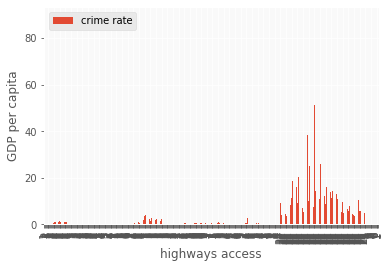

In [125]:
plt.style.use('ggplot')
df.plot(x='highways access', y='crime rate', kind='bar')
plt.ylabel('GDP per capita')